In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn import metrics

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12,6]

In [2]:
df = pd.read_csv('archive/high_diamond_ranked_10min.csv')

df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
df.isnull().values.any()

False

In [4]:
df.blueGoldDiff.values

array([  643, -2908, -1172, ..., -2416,  -839,   927], dtype=int64)

In [5]:
print(f"blue team winrate: {round(df['blueWins'].mean()*100, 2)}%")

blue team winrate: 49.9%


In [6]:
# first blood winrate
fb_winrate = df.groupby('blueFirstBlood')['blueWins'].mean() * 100
fb_winrate

blueFirstBlood
0    39.717907
1    59.895729
Name: blueWins, dtype: float64

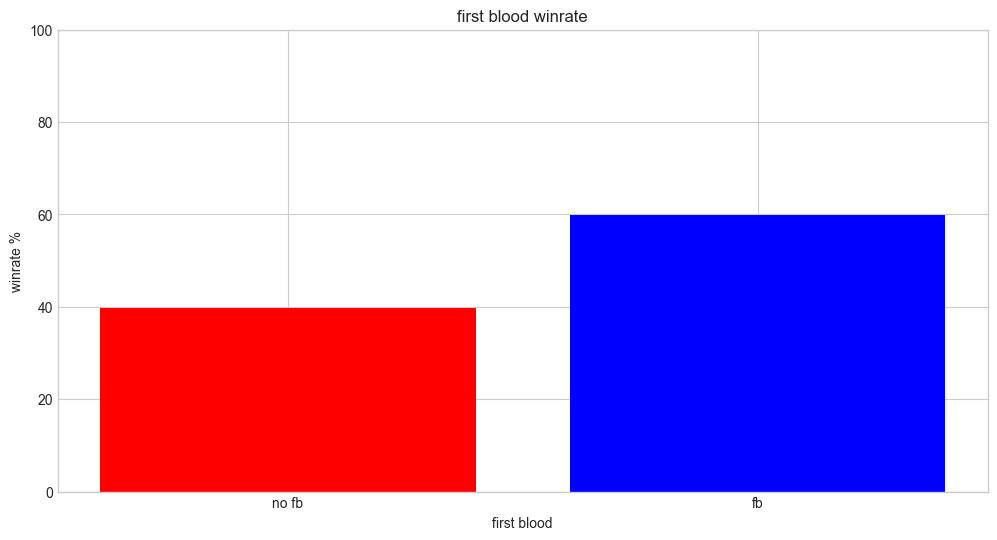

In [7]:
plt.bar(fb_winrate.index, fb_winrate.values, color = ['red', 'blue'])
plt.xticks(fb_winrate.index, ["no fb", "fb"])
plt.xlabel("first blood")
plt.ylabel("winrate %")
plt.ylim(0, 100)
plt.title("first blood winrate")
plt.show()

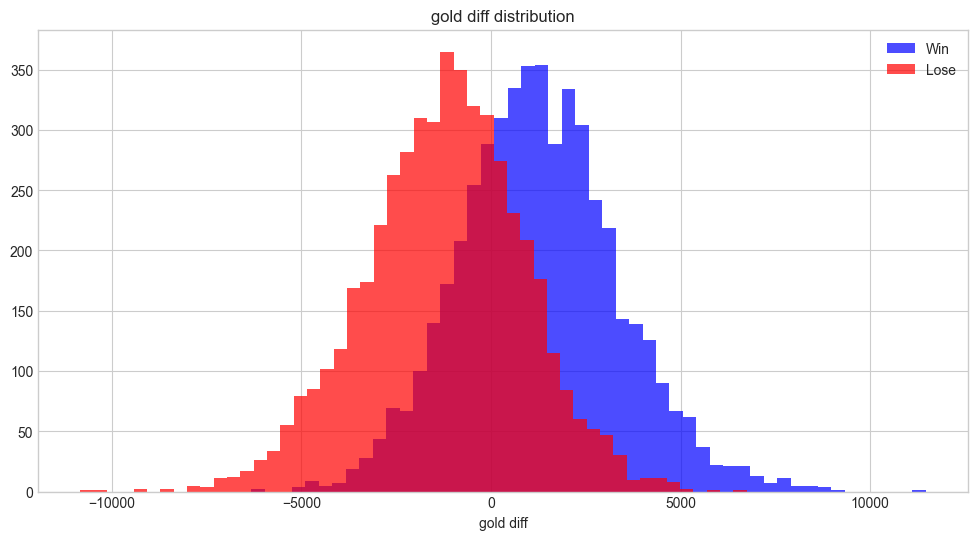

In [8]:
plt.hist(df[df['blueWins']==1]['blueGoldDiff'], bins=50, color='blue', alpha = 0.7, label='Win')
plt.hist(df[df['blueWins']==0]['blueGoldDiff'], bins=50, color='red', alpha = 0.7, label='Lose')
plt.xlabel('gold diff')
plt.title("gold diff distribution")
plt.legend()
plt.show()

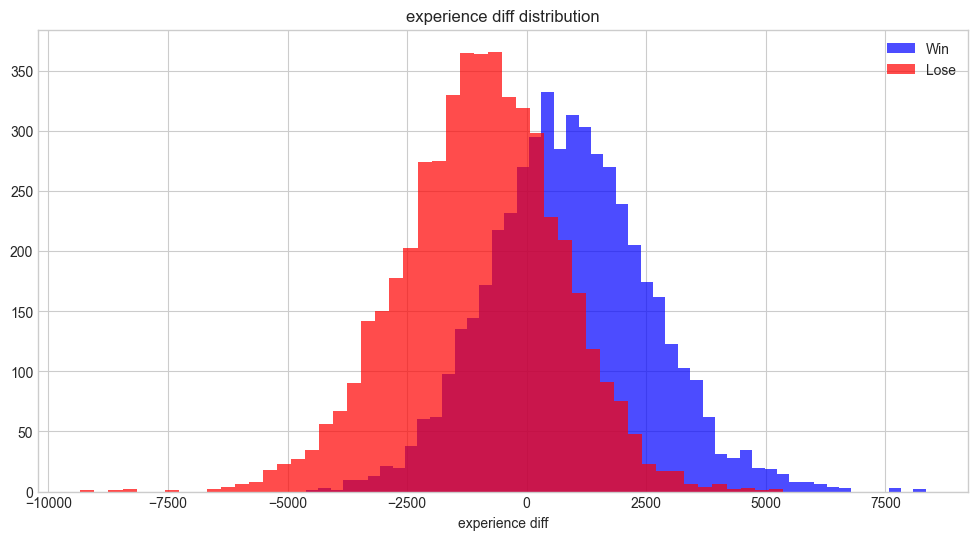

In [9]:
plt.hist(df[df['blueWins']==1]['blueExperienceDiff'], bins=50, alpha=0.7, label='Win', color='blue')
plt.hist(df[df['blueWins']==0]['blueExperienceDiff'], bins=50, alpha=0.7, label='Lose', color='red')
plt.xlabel("experience diff")
plt.title("experience diff distribution")
plt.legend()
plt.show()

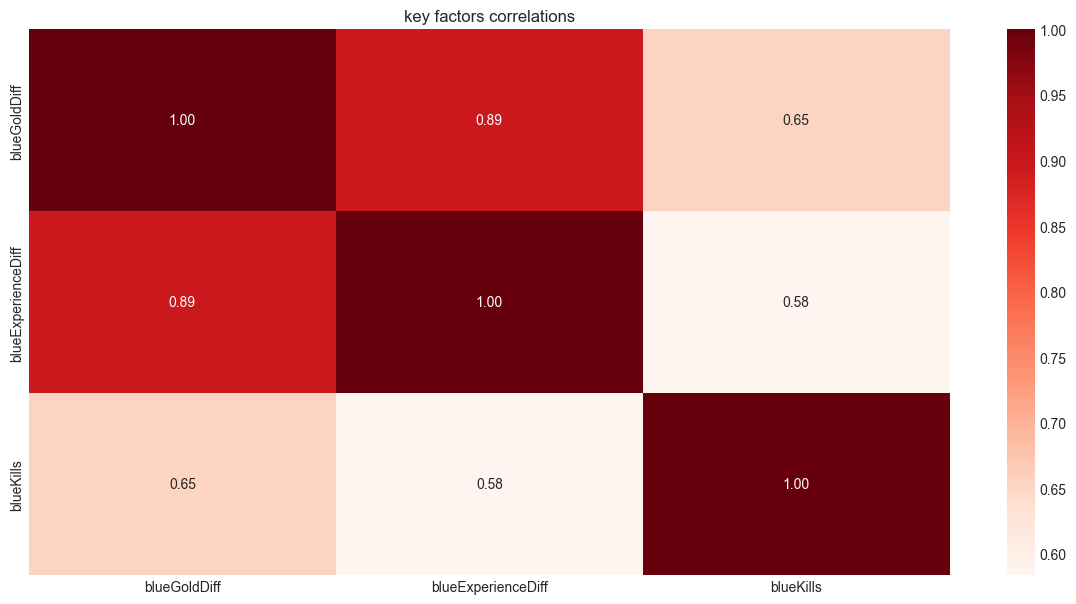

In [11]:
#correlation between key factors
key_factors = ['blueGoldDiff', 'blueExperienceDiff', 'blueKills']

sns.heatmap(df[key_factors].corr(), annot=True, fmt='.2f', cmap='Reds')
plt.tight_layout()
plt.title("key factors correlations")
plt.show()

In [12]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


[[954 332]
 [308 876]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1286
           1       0.73      0.74      0.73      1184

    accuracy                           0.74      2470
   macro avg       0.74      0.74      0.74      2470
weighted avg       0.74      0.74      0.74      2470



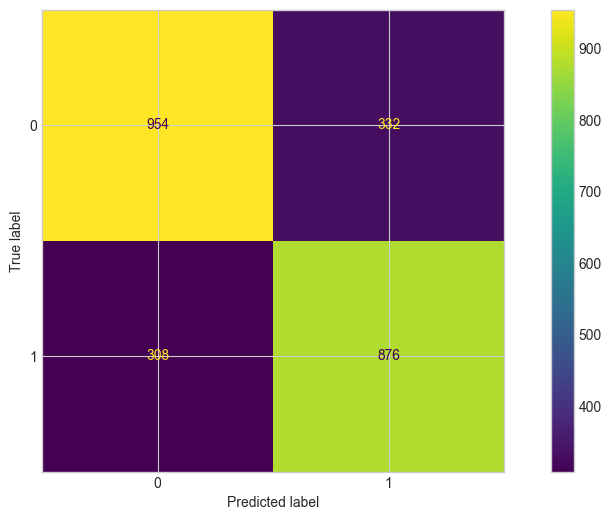

In [ ]:
variables = ['blueWardsPlaced', 'blueWardsDestroyed', "blueFirstBlood", 'blueEliteMonsters', 'blueDragons',
              'blueHeralds', 'blueTowersDestroyed', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin']

X = df[variables]
y = df["blueWins"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

logreg = LogisticRegression(random_state=1000, max_iter=5000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix = cnf_matrix).plot()